# Crawling Data Twitter + Cleaning

In [36]:
import tweepy
from tweepy import OAuthHandler
import json
import pandas as pd
import csv


CONSUMER_KEY = 'MPc7Gg7lpJ70qwaCADwobAPx5'
CONSUMER_SECRET = 'mlwP0RjYVbKaWpBGBnjYlbpQSPQJ1SP7k7Ng8eTO2JQ61tDFwS'
ACCESS_TOKEN = '706895602404052992-6yFFdD4QSR8xbwY9DJccK36TJzNXx99'
ACCESS_TOKEN_SECRET = '3ZTsgtSwqF1AnulJfc2nXgtfOTmJudgzyKIXzEBWTV06e'


auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True) 


tweets = api.search(q="pindah ibu kota OR pinda ibu kota OR #pindahibukota")

message,favorite_count,retweet_count,created_at,user_name,followers_count = [],[],[],[],[],[]

for tweet in tweepy.Cursor(api.search, q="pindah ibu kota OR pinda ibu kota OR #pindahibukota -filter:retweets", tweet_mode="extended", rpp=100, count=100, result_type="recent", include_rts=False, include_entities=True, lang="id").items(5000):
    message.append(tweet.full_text)
    favorite_count.append(tweet.favorite_count)
    retweet_count.append(tweet.retweet_count)
    created_at.append(tweet.created_at)
    user_name.append(tweet.user.name)
    followers_count.append(tweet.user.followers_count)
    
list_ = {'Message': message, 
         'Favorite Count' : favorite_count,
         'Retweet Count' :retweet_count,
         'Created At' : created_at,
         'Username' : user_name,
         'Followers' : followers_count}

df = pd.DataFrame(list_)
df.to_csv("result1.csv")
df

,Message,Favorite Count,Retweet Count,Created At,Username,Followers
0,@KompasTV Emang udah berapa kali? Pemindahan i...,0,0,2019-08-26 03:12:56,desneldi,247
1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,0,0,2019-08-26 03:12:21,Bion,19
2,"Kalo ibu kota Indonesia pindah ke kalimantan, ...",0,0,2019-08-26 03:08:58,Rona,6
3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,1,0,2019-08-26 03:06:44,Kedaulatan Rakyat,58803
4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit...",0,0,2019-08-26 03:05:04,Tweets Gerindra,12594
5,Hari ini lihat berita Ibu kota jadi pindah &am...,0,0,2019-08-26 03:03:55,go,110
6,"Pindah Ibu Kota, Banyak PNS Bakal Minta Pensiu...",0,0,2019-08-26 03:03:01,News Update,1069
7,"Ibu Kota Pindah, Ini Catatan Penting PKS Buat ...",2,1,2019-08-26 03:00:21,GELORA NEWS,61992
8,"Kalau indonesia katanya mau pindah ibu kota, g...",0,0,2019-08-26 02:59:04,jawara9,90
9,Rencana pemindahan ibu kota negara dari Jakart...,0,0,2019-08-26 02:59:03,JPNN.com,47486


In [2]:
import tweepy
import pandas as pd

f=pd.read_csv("Result1.csv")
f

,Unnamed: 0,Message,Favorite Count,Retweet Count,Created At,Username,Followers
0,0,@KompasTV Emang udah berapa kali? Pemindahan i...,0,0,2019-08-26 03:12:56,desneldi,247
1,1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,0,0,2019-08-26 03:12:21,Bion,19
2,2,"Kalo ibu kota Indonesia pindah ke kalimantan, ...",0,0,2019-08-26 03:08:58,Rona,6
3,3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,1,0,2019-08-26 03:06:44,Kedaulatan Rakyat,58803
4,4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit...",0,0,2019-08-26 03:05:04,Tweets Gerindra,12594
5,5,Hari ini lihat berita Ibu kota jadi pindah &am...,0,0,2019-08-26 03:03:55,go,110
6,6,"Pindah Ibu Kota, Banyak PNS Bakal Minta Pensiu...",0,0,2019-08-26 03:03:01,News Update,1069
7,7,"Ibu Kota Pindah, Ini Catatan Penting PKS Buat ...",2,1,2019-08-26 03:00:21,GELORA NEWS,61992
8,8,"Kalau indonesia katanya mau pindah ibu kota, g...",0,0,2019-08-26 02:59:04,jawara9,90
9,9,Rencana pemindahan ibu kota negara dari Jakart...,0,0,2019-08-26 02:59:03,JPNN.com,47486


In [3]:
tweet = pd.DataFrame(f["Message"])
tweet

,Message
0,@KompasTV Emang udah berapa kali? Pemindahan i...
1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...
2,"Kalo ibu kota Indonesia pindah ke kalimantan, ..."
3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...
4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit..."
5,Hari ini lihat berita Ibu kota jadi pindah &am...
6,"Pindah Ibu Kota, Banyak PNS Bakal Minta Pensiu..."
7,"Ibu Kota Pindah, Ini Catatan Penting PKS Buat ..."
8,"Kalau indonesia katanya mau pindah ibu kota, g..."
9,Rencana pemindahan ibu kota negara dari Jakart...


In [4]:
from bs4 import BeautifulSoup

cleanHTML = []
i=0
for column in tweet.Message:
    clean = BeautifulSoup(tweet.Message[i], 'lxml') # menghilangkan text field as ‘&amp’,’&quot’,etc
    cleanHTML.insert(i, clean.get_text())
    i+=1

tweet["cleanHTML"] = cleanHTML
tweet.head(10)

,Message,cleanHTML
0,@KompasTV Emang udah berapa kali? Pemindahan i...,@KompasTV Emang udah berapa kali? Pemindahan i...
1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...
2,"Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ..."
3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...
4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit..."
5,Hari ini lihat berita Ibu kota jadi pindah &am...,Hari ini lihat berita Ibu kota jadi pindah & r...
6,"Pindah Ibu Kota, Banyak PNS Bakal Minta Pensiu...","Pindah Ibu Kota, Banyak PNS Bakal Minta Pensiu..."
7,"Ibu Kota Pindah, Ini Catatan Penting PKS Buat ...","Ibu Kota Pindah, Ini Catatan Penting PKS Buat ..."
8,"Kalau indonesia katanya mau pindah ibu kota, g...","Kalau indonesia katanya mau pindah ibu kota, g..."
9,Rencana pemindahan ibu kota negara dari Jakart...,Rencana pemindahan ibu kota negara dari Jakart...


In [5]:
import re
cleanMention = []
i=0
for column in tweet.cleanHTML:
    clean = re.sub(r'@[A-Za-z0-9_]+','', tweet.cleanHTML[i]) # menghilangkan tanda @ mention
    cleanMention.insert(i, clean)
    i+=1

tweet["cleanMention"] = cleanMention
tweet.head(10)

,Message,cleanHTML,cleanMention
0,@KompasTV Emang udah berapa kali? Pemindahan i...,@KompasTV Emang udah berapa kali? Pemindahan i...,Emang udah berapa kali? Pemindahan ibu kota k...
1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,Cobalah pikirkan gmn cara untuk mengurangi hu...
2,"Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ..."
3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...
4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit..."
5,Hari ini lihat berita Ibu kota jadi pindah &am...,Hari ini lihat berita Ibu kota jadi pindah & r...,Hari ini lihat berita Ibu kota jadi pindah & r...
6,"Pindah Ibu Kota, Banyak PNS Bakal Minta Pensiu...","Pindah Ibu Kota, Banyak PNS Bakal Minta Pensiu...","Pindah Ibu Kota, Banyak PNS Bakal Minta Pensiu..."
7,"Ibu Kota Pindah, Ini Catatan Penting PKS Buat ...","Ibu Kota Pindah, Ini Catatan Penting PKS Buat ...","Ibu Kota Pindah, Ini Catatan Penting PKS Buat ..."
8,"Kalau indonesia katanya mau pindah ibu kota, g...","Kalau indonesia katanya mau pindah ibu kota, g...","Kalau indonesia katanya mau pindah ibu kota, g..."
9,Rencana pemindahan ibu kota negara dari Jakart...,Rencana pemindahan ibu kota negara dari Jakart...,Rencana pemindahan ibu kota negara dari Jakart...


In [6]:
cleanURL = []
i=0
for column in tweet.cleanMention:
    clean = re.sub('https?://[A-Za-z0-9./]+','', tweet.cleanMention[i]) # menghilangkan URL
    cleanURL.insert(i, clean)
    i+=1

tweet["cleanURL"] = cleanURL
tweet.head()

,Message,cleanHTML,cleanMention,cleanURL
0,@KompasTV Emang udah berapa kali? Pemindahan i...,@KompasTV Emang udah berapa kali? Pemindahan i...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...
1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...
2,"Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ..."
3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...
4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit..."


In [7]:
cleanUnicode = []
i=0
for column in tweet.cleanURL:
    clean = re.sub(r"\\x(.){2}", "", tweet.cleanURL[i]) # menghilangkan Unicode
    cleanUnicode.insert(i, clean)
    i+=1

tweet["cleanUnicode"] = cleanUnicode
tweet.head()

,Message,cleanHTML,cleanMention,cleanURL,cleanUnicode
0,@KompasTV Emang udah berapa kali? Pemindahan i...,@KompasTV Emang udah berapa kali? Pemindahan i...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...
1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...
2,"Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ..."
3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...
4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit..."


In [8]:
cleanOther = []
i=0
for column in tweet.cleanUnicode:
    clean = re.sub(r"^b[\'\"]|#[A-Za-z0-9]+|RT|\\n|  +|:\(|:\)|:v|:V|:'\)|:'\(", " ", tweet.cleanUnicode[i]) # menghilangkan karakter lain
    clean = re.sub("\W+| +", " ", clean)
    cleanOther.insert(i, clean)
    i+=1

tweet["cleanOther"] = cleanOther
tweet.head()

,Message,cleanHTML,cleanMention,cleanURL,cleanUnicode,cleanOther
0,@KompasTV Emang udah berapa kali? Pemindahan i...,@KompasTV Emang udah berapa kali? Pemindahan i...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali Pemindahan ibu kota ka...
1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...
2,"Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...",Kalo ibu kota Indonesia pindah ke kalimantan j...
3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin 26 8 19 Pindah Ibu Kota Jangan ...
4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...",Survei Berencana Ajukan Pensiun Dini Mayoritas...


In [9]:
cleanNum = []
i=0
for column in tweet.cleanOther:
    clean = re.sub(r"\d+", " ", tweet.cleanOther[i]) # menghilangkan karakter lain
    cleanNum.insert(i, clean)
    i+=1

tweet["cleanNum"] = cleanNum
tweet.head()

,Message,cleanHTML,cleanMention,cleanURL,cleanUnicode,cleanOther,cleanNum
0,@KompasTV Emang udah berapa kali? Pemindahan i...,@KompasTV Emang udah berapa kali? Pemindahan i...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali Pemindahan ibu kota ka...,Emang udah berapa kali Pemindahan ibu kota ka...
1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...
2,"Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...",Kalo ibu kota Indonesia pindah ke kalimantan j...,Kalo ibu kota Indonesia pindah ke kalimantan j...
3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin 26 8 19 Pindah Ibu Kota Jangan ...,KR Edisi Senin Pindah Ibu Kota Jangan Gr...
4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...",Survei Berencana Ajukan Pensiun Dini Mayoritas...,Survei Berencana Ajukan Pensiun Dini Mayoritas...


In [10]:
result = []
i=0
for column in tweet.cleanNum:
    clean = tweet.cleanNum[i].lower() # menghilangkan karakter lain
    result.insert(i, clean)
    i+=1

tweet["result"] = result
tweet.head()

,Message,cleanHTML,cleanMention,cleanURL,cleanUnicode,cleanOther,cleanNum,result
0,@KompasTV Emang udah berapa kali? Pemindahan i...,@KompasTV Emang udah berapa kali? Pemindahan i...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali Pemindahan ibu kota ka...,Emang udah berapa kali Pemindahan ibu kota ka...,emang udah berapa kali pemindahan ibu kota ka...
1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,cobalah pikirkan gmn cara untuk mengurangi hu...
2,"Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...",Kalo ibu kota Indonesia pindah ke kalimantan j...,Kalo ibu kota Indonesia pindah ke kalimantan j...,kalo ibu kota indonesia pindah ke kalimantan j...
3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin 26 8 19 Pindah Ibu Kota Jangan ...,KR Edisi Senin Pindah Ibu Kota Jangan Gr...,kr edisi senin pindah ibu kota jangan gr...
4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...",Survei Berencana Ajukan Pensiun Dini Mayoritas...,Survei Berencana Ajukan Pensiun Dini Mayoritas...,survei berencana ajukan pensiun dini mayoritas...


In [11]:
hasil = []
i=0
for column in tweet.result:
    clean = re.sub(r" +", " ", tweet.result[i]) # menghilangkan karakter lain
    hasil.insert(i, clean)
    i+=1

tweet["hasil"] = hasil
tweet.head()

,Message,cleanHTML,cleanMention,cleanURL,cleanUnicode,cleanOther,cleanNum,result,hasil
0,@KompasTV Emang udah berapa kali? Pemindahan i...,@KompasTV Emang udah berapa kali? Pemindahan i...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali? Pemindahan ibu kota k...,Emang udah berapa kali Pemindahan ibu kota ka...,Emang udah berapa kali Pemindahan ibu kota ka...,emang udah berapa kali pemindahan ibu kota ka...,emang udah berapa kali pemindahan ibu kota ka...
1,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,@CNNIndonesia Cobalah pikirkan gmn cara untuk ...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,Cobalah pikirkan gmn cara untuk mengurangi hu...,cobalah pikirkan gmn cara untuk mengurangi hu...,cobalah pikirkan gmn cara untuk mengurangi hu...
2,"Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...","Kalo ibu kota Indonesia pindah ke kalimantan, ...",Kalo ibu kota Indonesia pindah ke kalimantan j...,Kalo ibu kota Indonesia pindah ke kalimantan j...,kalo ibu kota indonesia pindah ke kalimantan j...,kalo ibu kota indonesia pindah ke kalimantan j...
3,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin (26/8/19)\nPindah Ibu Kota Jang...,KR Edisi Senin 26 8 19 Pindah Ibu Kota Jangan ...,KR Edisi Senin Pindah Ibu Kota Jangan Gr...,kr edisi senin pindah ibu kota jangan gr...,kr edisi senin pindah ibu kota jangan grusa gr...
4,"Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...","Survei: Berencana Ajukan Pensiun Dini, Mayorit...",Survei Berencana Ajukan Pensiun Dini Mayoritas...,Survei Berencana Ajukan Pensiun Dini Mayoritas...,survei berencana ajukan pensiun dini mayoritas...,survei berencana ajukan pensiun dini mayoritas...


In [12]:
tweet["hasil"].to_csv("result3.csv", header=True)

In [13]:
data = pd.DataFrame(tweet["hasil"])

In [14]:
data

,hasil
0,emang udah berapa kali pemindahan ibu kota ka...
1,cobalah pikirkan gmn cara untuk mengurangi hu...
2,kalo ibu kota indonesia pindah ke kalimantan j...
3,kr edisi senin pindah ibu kota jangan grusa gr...
4,survei berencana ajukan pensiun dini mayoritas...
5,hari ini lihat berita ibu kota jadi pindah rup...
6,pindah ibu kota banyak pns bakal minta pensiun...
7,ibu kota pindah ini catatan penting pks buat p...
8,kalau indonesia katanya mau pindah ibu kota gw...
9,rencana pemindahan ibu kota negara dari jakart...


In [15]:
import nltk

token = []

for i in data.hasil:
    token = token + nltk.word_tokenize(i)

token

['emang',
 'udah',
 'berapa',
 'kali',
 'pemindahan',
 'ibu',
 'kota',
 'kabupaten',
 'aja',
 'masih',
 'sebatas',
 'pindah',
 'kantor',
 'cobalah',
 'pikirkan',
 'gmn',
 'cara',
 'untuk',
 'mengurangi',
 'hutang',
 'negara',
 'bukan',
 'malah',
 'sibuk',
 'urusan',
 'pindah',
 'ibu',
 'kota',
 'yang',
 'notabene',
 'membutuhkan',
 'biaya',
 'yang',
 'tidak',
 'sedikit',
 'mau',
 'cari',
 'peluang',
 'nambah',
 'hutang',
 'lagi',
 'apa',
 'ya',
 'presiden',
 'kok',
 'kayak',
 'ahh',
 'sudahlah',
 'kalo',
 'ibu',
 'kota',
 'indonesia',
 'pindah',
 'ke',
 'kalimantan',
 'jkt',
 'ganti',
 'nama',
 'dong',
 'jadi',
 'klmntn',
 'kr',
 'edisi',
 'senin',
 'pindah',
 'ibu',
 'kota',
 'jangan',
 'grusa',
 'grusu',
 'baca',
 'juga',
 '_',
 'disetujui',
 'raperda',
 'apbd',
 'perubahan',
 'survei',
 'berencana',
 'ajukan',
 'pensiun',
 'dini',
 'mayoritas',
 'pns',
 'ogah',
 'ibu',
 'kota',
 'pindah',
 'ke',
 'kalimantan',
 'hari',
 'ini',
 'lihat',
 'berita',
 'ibu',
 'kota',
 'jadi',
 'pindah'

In [16]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stop_factory = StopWordRemoverFactory().get_stop_words()
token = list(filter(lambda t : t not in stop_factory, token))
token

['emang',
 'udah',
 'berapa',
 'kali',
 'pemindahan',
 'ibu',
 'kota',
 'kabupaten',
 'aja',
 'sebatas',
 'pindah',
 'kantor',
 'cobalah',
 'pikirkan',
 'gmn',
 'cara',
 'mengurangi',
 'hutang',
 'negara',
 'bukan',
 'malah',
 'sibuk',
 'urusan',
 'pindah',
 'ibu',
 'kota',
 'notabene',
 'membutuhkan',
 'biaya',
 'sedikit',
 'mau',
 'cari',
 'peluang',
 'nambah',
 'hutang',
 'apa',
 'presiden',
 'kok',
 'kayak',
 'ahh',
 'sudahlah',
 'kalo',
 'ibu',
 'kota',
 'indonesia',
 'pindah',
 'kalimantan',
 'jkt',
 'ganti',
 'nama',
 'dong',
 'jadi',
 'klmntn',
 'kr',
 'edisi',
 'senin',
 'pindah',
 'ibu',
 'kota',
 'jangan',
 'grusa',
 'grusu',
 'baca',
 '_',
 'disetujui',
 'raperda',
 'apbd',
 'perubahan',
 'survei',
 'berencana',
 'ajukan',
 'pensiun',
 'dini',
 'mayoritas',
 'pns',
 'ogah',
 'ibu',
 'kota',
 'pindah',
 'kalimantan',
 'hari',
 'lihat',
 'berita',
 'ibu',
 'kota',
 'jadi',
 'pindah',
 'rupiah',
 'terpuruk',
 'rasanya',
 'pengen',
 'jadi',
 'hulk',
 'aja',
 'gw',
 'pindah',
 '

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
token = [stemmer.stem(tokens) for tokens in token]

print(token)

['emang', 'udah', 'berapa', 'kali', 'pindah', 'ibu', 'kota', 'kabupaten', 'aja', 'batas', 'pindah', 'kantor', 'coba', 'pikir', 'gmn', 'cara', 'kurang', 'hutang', 'negara', 'bukan', 'malah', 'sibuk', 'urus', 'pindah', 'ibu', 'kota', 'notabene', 'butuh', 'biaya', 'sedikit', 'mau', 'cari', 'peluang', 'nambah', 'hutang', 'apa', 'presiden', 'kok', 'kayak', 'ahh', 'sudah', 'kalo', 'ibu', 'kota', 'indonesia', 'pindah', 'kalimantan', 'jkt', 'ganti', 'nama', 'dong', 'jadi', 'klmntn', 'kr', 'edisi', 'senin', 'pindah', 'ibu', 'kota', 'jangan', 'grusa', 'grusu', 'baca', '', 'tuju', 'raperda', 'apbd', 'ubah', 'survei', 'rencana', 'aju', 'pensiun', 'dini', 'mayoritas', 'pns', 'ogah', 'ibu', 'kota', 'pindah', 'kalimantan', 'hari', 'lihat', 'berita', 'ibu', 'kota', 'jadi', 'pindah', 'rupiah', 'puruk', 'rasa', 'ken', 'jadi', 'hulk', 'aja', 'gw', 'pindah', 'ibu', 'kota', 'banyak', 'pns', 'bakal', 'minta', 'pensiun', 'dini', 'ibu', 'kota', 'pindah', 'catat', 'penting', 'pks', 'buat', 'perintah', 'kalau',

from collections import Counter
counts = Counter(token)
sort = sorted(counts.items(), key=lambda count:count[1], reverse=True)
sort

In [18]:
token

['emang',
 'udah',
 'berapa',
 'kali',
 'pindah',
 'ibu',
 'kota',
 'kabupaten',
 'aja',
 'batas',
 'pindah',
 'kantor',
 'coba',
 'pikir',
 'gmn',
 'cara',
 'kurang',
 'hutang',
 'negara',
 'bukan',
 'malah',
 'sibuk',
 'urus',
 'pindah',
 'ibu',
 'kota',
 'notabene',
 'butuh',
 'biaya',
 'sedikit',
 'mau',
 'cari',
 'peluang',
 'nambah',
 'hutang',
 'apa',
 'presiden',
 'kok',
 'kayak',
 'ahh',
 'sudah',
 'kalo',
 'ibu',
 'kota',
 'indonesia',
 'pindah',
 'kalimantan',
 'jkt',
 'ganti',
 'nama',
 'dong',
 'jadi',
 'klmntn',
 'kr',
 'edisi',
 'senin',
 'pindah',
 'ibu',
 'kota',
 'jangan',
 'grusa',
 'grusu',
 'baca',
 '',
 'tuju',
 'raperda',
 'apbd',
 'ubah',
 'survei',
 'rencana',
 'aju',
 'pensiun',
 'dini',
 'mayoritas',
 'pns',
 'ogah',
 'ibu',
 'kota',
 'pindah',
 'kalimantan',
 'hari',
 'lihat',
 'berita',
 'ibu',
 'kota',
 'jadi',
 'pindah',
 'rupiah',
 'puruk',
 'rasa',
 'ken',
 'jadi',
 'hulk',
 'aja',
 'gw',
 'pindah',
 'ibu',
 'kota',
 'banyak',
 'pns',
 'bakal',
 'minta'

In [19]:
text = nltk.Text(token)
text.concordance('kalimantan')

Displaying 25 of 1016 matches:
ah kalo ibu kota indonesia pindah kalimantan jkt ganti nama dong jadi klmntn k
ayoritas pns ogah ibu kota pindah kalimantan hari lihat berita ibu kota jadi p
na pindah ibu kota negara jakarta kalimantan buat bagi besar pns instansi pusa
ayoritas pns ogah ibu kota pindah kalimantan prediksi ibu kota baru pusat peri
 tv pindah bentar ibu kota pindah kalimantan dki bikin negara sendiri kayak ha
ubah thku ibu kota jakarta pindah kalimantan asal jalur kereta api nambo cikar
 persen pns tolak ibu kota pindah kalimantan pindah ibu kota bukan selesai mas
 persen pns tolak ibu kota pindah kalimantan makin pindah ibu kota negara ibu 
ayoritas pns ogah ibu kota pindah kalimantan pakek sok an jakarta kondusif ter
angat tuju ibu kota negara pindah kalimantan ibu kota mau pindah trs dana eman
ndah ibu kota pns asn ogah pindah kalimantan gubrakkkk gin yaaa hutan gundul l
a walaupun ibukota ga jadi pindah kalimantan hutan kalimantan lambat laun teta
a ga jadi pindah kali

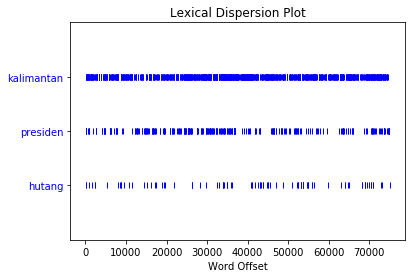

In [22]:
text.dispersion_plot(['kalimantan','presiden','hutang'])

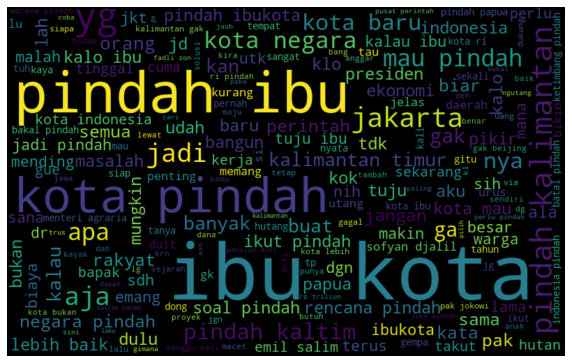

In [23]:
import matplotlib.pyplot as plt
cloud = ' '.join([text for text in token])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(cloud)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [24]:
from collections import Counter
counts = Counter(token)
sorted_counts = sorted(counts.items(), key = lambda count: count[1], reverse = True)
sorted_counts

[('pindah', 5778),
 ('kota', 5469),
 ('ibu', 5363),
 ('yg', 1086),
 ('kalimantan', 1016),
 ('jakarta', 748),
 ('jadi', 657),
 ('negara', 647),
 ('mau', 596),
 ('baru', 555),
 ('apa', 447),
 ('aja', 427),
 ('jokowi', 416),
 ('perintah', 411),
 ('indonesia', 399),
 ('kaltim', 388),
 ('gak', 372),
 ('lebih', 351),
 ('nya', 323),
 ('kalau', 286),
 ('presiden', 279),
 ('baik', 275),
 ('ekonomi', 271),
 ('bukan', 268),
 ('kalo', 266),
 ('buat', 261),
 ('tak', 260),
 ('tuju', 252),
 ('rakyat', 249),
 ('ga', 244),
 ('menteri', 239),
 ('bangun', 239),
 ('papua', 232),
 ('timur', 232),
 ('pak', 231),
 ('soal', 230),
 ('ibukota', 228),
 ('rencana', 226),
 ('banyak', 225),
 ('orang', 209),
 ('kan', 206),
 ('ikut', 205),
 ('dulu', 203),
 ('jangan', 198),
 ('kata', 183),
 ('pns', 178),
 ('sama', 170),
 ('pusat', 167),
 ('semua', 165),
 ('bakal', 158),
 ('biar', 157),
 ('utang', 148),
 ('alas', 146),
 ('tetap', 145),
 ('kaji', 142),
 ('perlu', 142),
 ('klo', 140),
 ('udah', 135),
 ('masalah', 133),
 

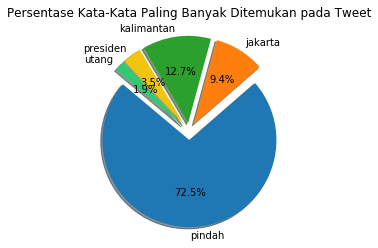

In [25]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#f1c40f", "#2ecc71"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  
plt.pie(["5778", "748","1016","279","148"], labels=["pindah","jakarta","kalimantan","presiden","utang"], explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Persentase Kata-Kata Paling Banyak Ditemukan pada Tweet")
plt.show()

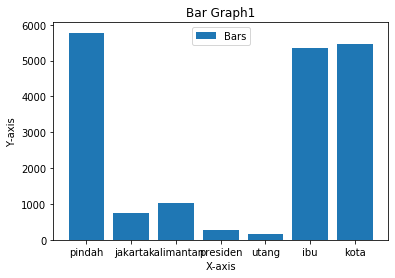

In [26]:
x = ["pindah","jakarta","kalimantan","presiden","utang", "ibu", "kota"]
y=[5778,748,1016,279,148,5363,5469]
plt.bar(x,y,label ='Bars')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Bar Graph1')
plt.legend()
plt.show()

# Clustering Data Twitter

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
tf = vectorizer.fit_transform(token).toarray()
tf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
tf_feature_names = vectorizer.get_feature_names()
tf_feature_names

['a',
 'acara',
 'ada',
 'adil',
 'agraria',
 'aja',
 'aju',
 'akal',
 'akhir',
 'aku',
 'alam',
 'alas',
 'alih',
 'aman',
 'an',
 'anak',
 'anggap',
 'anggar',
 'anies',
 'apa',
 'arti',
 'asal',
 'aset',
 'asn',
 'atas',
 'atr',
 'atur',
 'baca',
 'bagaimana',
 'bagi',
 'bagus',
 'bahas',
 'bahkan',
 'baik',
 'bakal',
 'bakar',
 'balik',
 'balikpapan',
 'banding',
 'bang',
 'banget',
 'bangsa',
 'bangun',
 'banjir',
 'bantah',
 'banyak',
 'bapak',
 'bappenas',
 'baru',
 'batal',
 'bawa',
 'bayar',
 'bbm',
 'beban',
 'beberapa',
 'beda',
 'begini',
 'beijing',
 'bekas',
 'beli',
 'benah',
 'benar',
 'bencana',
 'bener',
 'berapa',
 'berita',
 'besar',
 'biar',
 'biasa',
 'biaya',
 'bicara',
 'bijak',
 'bikin',
 'bila',
 'bilang',
 'bisnis',
 'bkn',
 'blm',
 'bpjs',
 'bro',
 'buang',
 'buat',
 'buka',
 'bukan',
 'butuh',
 'cara',
 'cari',
 'catat',
 'cek',
 'cepat',
 'cerdas',
 'coba',
 'cukup',
 'cuma',
 'd',
 'daerah',
 'dah',
 'dampak',
 'dana',
 'dapat',
 'dasar',
 'deh',
 'demo',

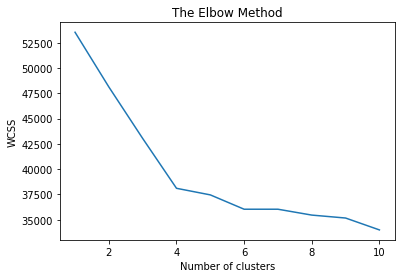

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(tf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 4, n_init = 20, n_jobs = 1)
kmeans.fit(tf)

common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print('Cluster ' + str(num) + ' : ' + ', '.join(tf_feature_names[token] for token in centroid))

Cluster 0 : yg, kalimantan, jakarta, jadi, negara, mau, baru, apa, aja, jokowi, perintah, indonesia, kaltim, gak, lebih, nya, kalau, presiden, baik, ekonomi, bukan, kalo, buat, tak, tuju
Cluster 1 : pindah, ibu, kota, jadi, mau, indonesia, yg, kaltim, bukan, rakyat, orang, apa, presiden, nya, soal, perintah, mana, sama, papua, timur, udah, tak, menteri, bangun, dgn
Cluster 2 : ibu, kota, pindah, jadi, mau, apa, indonesia, kaltim, bukan, rakyat, orang, perintah, soal, nya, mana, presiden, yg, pak, timur, papua, sama, kalimantan, udah, tdk, satu
Cluster 3 : kota, baru, negara, ibu, pindah, jadi, mau, indonesia, apa, kaltim, bukan, rakyat, orang, yg, soal, perintah, nya, presiden, mana, timur, papua, sama, pak, udah, tdk


# Classification using English Text

In [38]:
import tweepy
import pandas as pd
import numpy as np  
from tweepy import Cursor
import csv
from textblob import TextBlob
import re
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
import tweepy
ACCESS_TOKEN = '2787788646-yMHQKZyvPNsVbOnwsAZ59OiV9SCmMXinLzaZWmX' 
ACCESS_SECRET ='neggqoMhDjuFKqbGSsESe2oZipOPe0VXTX3vyp6tmtQnf' 
CONSUMER_KEY = 'RvyqIshB50ipFNYI5KRX3L56c' 
CONSUMER_SECRET = 'CjgesMNKIakvQDHAz0NiAOGj68kkv02mXbtEsm2N8O8bYWis5Y'

def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    api = tweepy.API(auth)
    return api

api = connect_to_twitter_OAuth()

In [3]:
for tweet in tweepy.Cursor(api.user_timeline, id='nytopinion', tweet_mode="extended").items(50):
    print(tweet.full_text)

RT @EricLiptonNYT: NYT OpEd piece from a departing State Department Foreign Service officer: "My Final Break With the Trump State Departmen…
RT @SenTomCotton: America has a long history of negotiating w/ foreign powers to acquire strategically important land. We can do it again b…
At least 29 states have laws that make H.I.V. nondisclosure, exposure or transmission a crime, write Chris Beyrer and Robert Suttle https://t.co/ETxxcG4WfU
"What of the administration’s policies is there left to defend to foreign audiences, other than a promise that we’re a democracy and that there are future elections to come?" https://t.co/DvXyvKoLoA
"Books may look the same wherever you buy them, but that doesn’t mean that the lowest price is the best value," writes @MargaretRenkl https://t.co/UwblS90ncn
"Terror, in its most primal form, is unleashed in Kashmir through the fine balance between what is made known and what is kept unknown," says @niyashahdad https://t.co/jyp0QrRNWx
"But when Trump’s supporte

In [ ]:
csvFile = open('newYorkRaw1.csv', 'a')
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.user_timeline, id='nytopinion', tweet_mode="extended",exclude_replies = True).items(10000):
    csvWriter.writerow([tweet.created_at, tweet.full_text.encode('utf-8')])
csvFile.close()

In [39]:
def sentiment_analysis(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [40]:
#Fungsi untuk membuat Diagram Pie
def showPieChart(positive,neutral,negative):
    labels = 'Positive', 'Neutral', 'Negative'
    color = ['yellow','green','orange']
    value = [positive, neutral, negative]
    explode = (0.1, 0.1, 0.1)
    plt.pie(value,autopct='%1.1f%%',colors=color, labels=labels , shadow= True,explode = explode , startangle=140)
    plt.show()

In [41]:
data_s = pd.read_csv('newYorkRaw1.csv')
headers = ["created_at","tweet"]
data_s.columns = headers

In [42]:
for i in data_s["tweet"]:
    print(i)

b'"Everything in Trump\xe2\x80\x99s view is about whether someone is nice or nasty to him. It\xe2\x80\x99s not about the country at all. It\xe2\x80\x99s not about historical precedent or value of continuity," writes @CharlesMBlow. https://t.co/rMub31midj'
b"At least the collapse of democratic norms will come with ample parking at Donald Trump's luxury Doral golf resort https://t.co/JsfvCgcT1y"
b'"The Brazilian Amazon is more than trees; about 25 million people live and work there," writes Roberto Mangabeira Unger. "We need to ensure that the forest is worth more standing than cut down." https://t.co/xePkR1PAh7'
b'"Mr. Trump, who probably has never heard of Smoot or Hawley, is single-handedly responsible for jeopardizing the world economy with his punitive tariffs" #NYTLetters https://t.co/rDIdTW2gDW'
b'There is only one way to fundamentally transform our health care system, say @Dmozaffarian and @DanRGlickman, and it\xe2\x80\x99s not through expanding coverage or containing costs https

b'RT @karaswisher: Chatting about my @nytopinion column about trust on the internet. (TRUST NO ONE.) Read and join me: https://t.co/D20KSjIXj\xe2\x80\xa6'
b'RT @fdwilkinson: Decency and Trump are antithetical. In supporting one, you oppose the other. https://t.co/g9OGek4DVU'
b'RT @stengel: How extraordinary it is that in 2019 an American president sees white supremacists as his base and seeks to protect them. http\xe2\x80\xa6'
b'RT @AmbassadorRice: Opinion | When the President Is a Bigot, the Poison Spreads - The New York Times https://t.co/NBXVWho7n1'
b'RT @isvettverde: "What we saw Saturday in El Paso is directly connected to the continuing, hate-driven rhetoric and policies coming out of\xe2\x80\xa6'
b'RT @PrivacyProject: Apple has designed its new credit card to address privacy concerns \xe2\x80\x94 something @karaswisher would like to see all tech\xe2\x80\xa6'
b'For all the claims the N.B.A. makes about women\xe2\x80\x99s empowerment, the league continues to disrespect its female 

In [43]:
import re
cleaning_tweet=[]
for tweet in data_s["tweet"]:
    tweet = tweet.replace("\\n\\n"," ")
    tweet = tweet.replace("&amp","")
    tweet = tweet.replace("\\n-","")
    tweet = tweet.replace("\\n","")
    tweet = tweet.replace("!\\","")
    tweet = re.sub('#.*','',tweet)
    #tweet = re.sub('@','',tweet)
    #tweet = re.sub(' @ ',' ',tweet)
    #tweet = re.sub(' @',' ',tweet)
    tweet = re.sub(' @\w+:',' ',tweet)
    tweet = re.sub('RT ','',tweet)
    tweet = tweet[2:len(tweet)-1]
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'((\\x[a-z0-9]{1,}){1,})','',tweet, flags=re.UNICODE)
    tweet = re.sub('([^0-9A-Za-z \t])|(\w+:\/\/\S+)','', tweet)
    cleaning_tweet.append(tweet)

In [44]:
data_s["tweet_clean"]=cleaning_tweet
data_s.head()

,created_at,tweet,tweet_clean
0,2019-08-27 00:37:17,"b'""Everything in Trump\xe2\x80\x99s view is ab...",Everything in Trump view is about whether some...
1,2019-08-27 00:18:56,"b""At least the collapse of democratic norms wi...",At least the collapse of democratic norms will...
2,2019-08-27 00:03:06,"b'""The Brazilian Amazon is more than trees; ab...",The Brazilian Amazon is more than trees about ...
3,2019-08-26 23:46:29,"b'""Mr. Trump, who probably has never heard of ...",Mr Trump who probably has never heard of Smoot...
4,2019-08-26 23:30:43,b'There is only one way to fundamentally trans...,There is only one way to fundamentally transfo...


In [45]:
#normalization
data_s["tweet_clean"] = [token.lower() for token in data_s["tweet_clean"]]
data_s["tweet_clean"]

0       everything in trump view is about whether some...
1       at least the collapse of democratic norms will...
2       the brazilian amazon is more than trees about ...
3       mr trump who probably has never heard of smoot...
4       there is only one way to fundamentally transfo...
5       it telling which outbursts from trump move rep...
6       the very stable genius in the oval office is i...
7        weve created an economy thats great for buyin...
8       going into 2020 democrats cannot fall into the...
9       what does the future of bioprinting hold traff...
10      the united states desperately needs a vision o...
11      in the service of our selves as consumers and ...
12      people living with hiv are still being prosecu...
13      our democracy though fragile in many ways has ...
14      the epa reports that 150000 miles of streams a...
15      we have fallen victim to a film noir conceptio...
16      as far back as 1867 secretary of state william...
17      it wou

In [46]:
data_s['sentiment_analysis'] = np.array([sentiment_analysis(tweet) for tweet in data_s['tweet_clean']])
data_s.head()

,created_at,tweet,tweet_clean,sentiment_analysis
0,2019-08-27 00:37:17,"b'""Everything in Trump\xe2\x80\x99s view is ab...",everything in trump view is about whether some...,-1
1,2019-08-27 00:18:56,"b""At least the collapse of democratic norms wi...",at least the collapse of democratic norms will...,-1
2,2019-08-27 00:03:06,"b'""The Brazilian Amazon is more than trees; ab...",the brazilian amazon is more than trees about ...,1
3,2019-08-26 23:46:29,"b'""Mr. Trump, who probably has never heard of ...",mr trump who probably has never heard of smoot...,1
4,2019-08-26 23:30:43,b'There is only one way to fundamentally trans...,there is only one way to fundamentally transfo...,0


In [47]:
positive = 0
negative = 0
neutral = 0

for i in data_s['sentiment_analysis'] :
    if i == 1:
        positive+=1
    elif i == 0:
        neutral+=1
    else:
        negative+=1

In [48]:
positive_percent = positive*100/len(data_s['tweet_clean'])
negative_percent = negative*100/len(data_s['tweet_clean'])
neutral_percent = neutral*100/len(data_s['tweet_clean'])

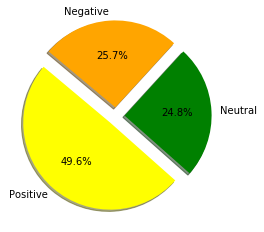

In [49]:
#Menampilkan persentase sentiment analysis dalam bentuk pie chart
showPieChart(positive=positive_percent,neutral=neutral_percent,negative=negative_percent )

In [50]:
data_s.to_csv("SA_newyork.csv")

In [51]:
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [52]:
#fungsi untuk membuat plot confusion matrix 
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        Normalization dapat diaplikasikan dengan setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

In [53]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_s['tweet_clean']).toarray()
X
Y = data_s['sentiment_analysis'].values

In [54]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
Y

array([-1, -1,  1, ...,  0, -1, -1])

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [58]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
model_score = model.score(X_train, Y_train)
accuracy = round(model_score * 100, 2)
accuracy 

98.61

In [60]:
model_score = model.score(X_test, Y_test)
accuracy = round(model_score * 100, 2)
accuracy 

72.66

In [62]:
predicted = model.predict(X_test)
predicted 

array([-1,  1,  1, -1,  0,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1, -1, -1,  0,  1,  1, -1, -1,  1,  1,  0,  1,  0,  1, -1,  0, -1,
        0,  1,  1, -1,  0, -1,  1,  1,  0, -1, -1, -1,  1,  1,  0,  1, -1,
        0, -1,  1,  0,  1, -1, -1, -1, -1, -1, -1,  0,  1,  0, -1,  1,  1,
        1,  1,  1,  1,  0,  0, -1,  1,  1,  1,  1,  1,  1,  0, -1,  0, -1,
       -1,  0,  0,  1,  1,  0,  0,  1,  0,  0, -1,  1, -1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  0, -1,  1,  0, -1,  1, -1,  1, -1,  1,
        1,  0, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  0,  1,  0,  1,  0,
        1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  0,  1, -1,
        1,  1,  1,  0,  0,  1, -1,  0,  1, -1,  1,  1,  1,  1,  0,  1,  1,
       -1,  0, -1,  0, -1, -1,  1,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,
        0,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  0, -1,  1,  1,  1,  0,
       -1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  0, -1,  1,  0,
        1, -1, -1, -1, -1

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predicted)

0.7265500794912559

In [64]:
#membuat classification report (precision, recall, f1-score, support)
target_names = ['Negative', 'Neutral', 'Positive']
report = classification_report(Y_test, predicted,target_names=target_names)
# "precision: tp/(tp+fp)"
# "recall: tp/(tp+fn)"
# "f1-score: (2xprecisionxrecall)/(precision+recall)"
#split classification report
print(report)

              precision    recall  f1-score   support

    Negative       0.65      0.73      0.69       177
     Neutral       0.75      0.62      0.68       142
    Positive       0.77      0.77      0.77       310

    accuracy                           0.73       629
   macro avg       0.72      0.71      0.71       629
weighted avg       0.73      0.73      0.73       629



In [65]:
conf_m = confusion_matrix(Y_test, predicted)
print(conf_m)

[[129   9  39]
 [ 21  88  33]
 [ 49  21 240]]


Confusion matrix, without normalization
[[129   9  39]
 [ 21  88  33]
 [ 49  21 240]]


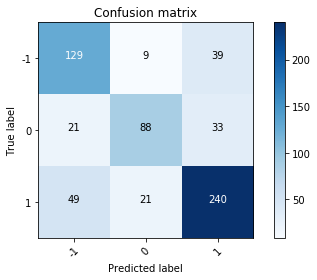

In [66]:
class_names = model.classes_
plt.figure()
plot_confusion_matrix(conf_m, classes=class_names,title='Confusion matrix')            
            #menyimpan plot
plt.savefig('pic1.jpg')

In [67]:
#mencari nilai TP, FP, FN, TN
FP = conf_m.sum(axis=0) - np.diag(conf_m)  
FN = conf_m.sum(axis=1) - np.diag(conf_m)
TP = np.diag(conf_m)
            
TN = conf_m[:].sum() - (FP + FN + TP)
            
#membuat dataframe utk confusion matrix
kolom = ["Negatif", "Netral", "Positif"]
label0 = pd.DataFrame(kolom)
label0.columns = ["Kelas"]
label1 = pd.DataFrame(TP)
label1.columns = ["True Positive"]
label2 = pd.DataFrame(FN)
label2.columns = ["False Negative"]
label3 = pd.DataFrame(FP)
label3.columns = ["False Positive"]
label4 = pd.DataFrame(TN)
label4.columns = ["True Negative"]
            
result_cm = pd.concat([label0, label1, label2, label3, label4], axis=1)
result_cm

,Kelas,True Positive,False Negative,False Positive,True Negative
0,Negatif,129,48,70,382
1,Netral,88,54,30,457
2,Positif,240,70,72,247


# Classification Teks Bahasa Indonesia (Keyword: Pindah ibu kota)

In [70]:
f=pd.read_csv("result.csv")
f.head()

,Unnamed: 0,hasil,label
0,0,emang udah berapa kali pemindahan ibu kota ka...,0
1,1,cobalah pikirkan gmn cara untuk mengurangi hu...,-1
2,2,kalo ibu kota indonesia pindah ke kalimantan j...,0
3,4,survei berencana ajukan pensiun dini mayoritas...,-1
4,5,hari ini lihat berita ibu kota jadi pindah rup...,1


In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
Y = f['label'].values

In [73]:
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(f['hasil']).toarray()
tf

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(tf,Y, test_size=0.2, random_state=42)

In [75]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
model_score = model.score(X_test, Y_test)
accuracy = round(model_score * 100, 2)
accuracy 

47.0

In [77]:
model_score = model.score(X_train, Y_train)
accuracy = round(model_score * 100, 2)
accuracy 

94.63

In [78]:
predicted = model.predict(X_test)
predicted 

array([ 0,  1, -1,  1,  0,  0, -1, -1,  1, -1,  0, -1, -1, -1, -1,  0,  0,
       -1, -1,  1, -1,  0, -1, -1, -1,  1, -1,  0, -1,  1, -1,  0,  0,  0,
       -1, -1, -1, -1,  0,  1,  0,  0,  1, -1,  1, -1, -1, -1,  0,  0, -1,
        0, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  0,  0,  0,
        0, -1,  0,  1,  0, -1, -1, -1,  0, -1, -1, -1,  1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  0,  0,  1, -1,  0, -1,  0,  0],
      dtype=int64)

In [79]:
#membuat classification report (precision, recall, f1-score, support)
report=classification_report(Y_test, predicted)
            # "precision: tp/(tp+fp)"
            # "recall: tp/(tp+fn)"
            # "f1-score: (2xprecisionxrecall)/(precision+recall)"
print(report)

              precision    recall  f1-score   support

          -1       0.61      0.66      0.63        47
           0       0.41      0.35      0.38        34
           1       0.20      0.21      0.21        19

    accuracy                           0.47       100
   macro avg       0.41      0.41      0.41       100
weighted avg       0.46      0.47      0.47       100



In [80]:
conf_m = confusion_matrix(Y_test, predicted)
print(conf_m)

[[31  8  8]
 [14 12  8]
 [ 6  9  4]]


In [81]:
#fungsi untuk membuat plot confusion matrix 
def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        Normalization dapat diaplikasikan dengan setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

Confusion matrix, without normalization
[[31  8  8]
 [14 12  8]
 [ 6  9  4]]


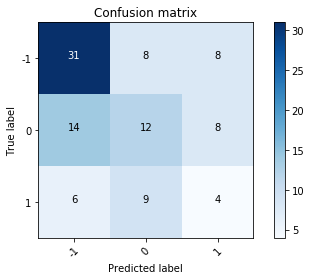

In [82]:
class_names = model.classes_
plt.figure()
plot_confusion_matrix(conf_m, classes=class_names,title='Confusion matrix')            
            #menyimpan plot
plt.savefig('pic1.jpg')

In [83]:
#mencari nilai TP, FP, FN, TN
FP = conf_m.sum(axis=0) - np.diag(conf_m)  
FN = conf_m.sum(axis=1) - np.diag(conf_m)
TP = np.diag(conf_m)
            
TN = conf_m[:].sum() - (FP + FN + TP)
            
#membuat dataframe utk confusion matrix
kolom = ["Negatif", "Netral", "Positif"]
label0 = pd.DataFrame(kolom)
label0.columns = ["Kelas"]
label1 = pd.DataFrame(TP)
label1.columns = ["True Positive"]
label2 = pd.DataFrame(FN)
label2.columns = ["False Negative"]
label3 = pd.DataFrame(FP)
label3.columns = ["False Positive"]
label4 = pd.DataFrame(TN)
label4.columns = ["True Negative"]
            
result_cm = pd.concat([label0, label1, label2, label3, label4], axis=1)

In [84]:
result_cm 

,Kelas,True Positive,False Negative,False Positive,True Negative
0,Negatif,31,16,20,33
1,Netral,12,22,17,49
2,Positif,4,15,16,65
